## Goal

The goal of this notebook is to develop a binary classifier of reviews on IMDB using the keras framework.

In [1]:
from keras.datasets import imdb

# The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words 
# in the training data. Rare words will be discarded. 

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_data)

25000

In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
print(train_labels[0])

1


In [5]:
max(max(seq) for seq in train_data)

9999

## Word Index

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for key, value in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(w - 3, '?') for w in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
min(word_index.values()), max(word_index.values())

(1, 88584)

In [8]:
reverse_word_index[1], reverse_word_index[2], reverse_word_index[3]

('the', 'and', 'a')

# One Hot Encoding 

In [9]:
import numpy as np


def one_hot_encode(sequences: np.array, dim: int = 10000) -> np.array:
    ret = np.zeros((sequences.shape[0], dim))
    for i, s in enumerate(sequences):
        ret[i, s] = 1 
    return ret

In [10]:
x_train = one_hot_encode(train_data)
x_test = one_hot_encode(test_data)

In [11]:
# the labels are already vectorized

y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

In [12]:
x_train.shape, y_train.shape

((25000, 10000), (25000,))

In [13]:
x_test.shape, y_test.shape

((25000, 10000), (25000,))

# Model 1

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.5064 - acc: 0.7941 - val_loss: 0.3739 - val_acc: 0.8716
Epoch 2/20
15000/15000 [==============================] - 1s 88us/step - loss: 0.2982 - acc: 0.9024 - val_loss: 0.2996 - val_acc: 0.8869
Epoch 3/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.2199 - acc: 0.9279 - val_loss: 0.2759 - val_acc: 0.8920
Epoch 4/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.1715 - acc: 0.9439 - val_loss: 0.3065 - val_acc: 0.8787
Epoch 5/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.1396 - acc: 0.9555 - val_loss: 0.2816 - val_acc: 0.8870
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1152 - acc: 0.9649 - val_loss: 0.3017 - val_acc: 0.8853
Epoch 7/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.0974 - acc: 0.9691 - val_loss: 0.3139 - val_ac

In [16]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 8s 324us/step


In [17]:
results

[0.7861024615478516, 0.8514000177383423]

In [18]:
for i in range(len(model.get_weights())):
    print(f'shape of layer {i + 1}: {model.get_weights()[i].shape}')

shape of layer 1: (10000, 16)
shape of layer 2: (16,)
shape of layer 3: (16, 16)
shape of layer 4: (16,)
shape of layer 5: (16, 1)
shape of layer 6: (1,)


In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [20]:
len(history_dict['val_loss']), len(history_dict['acc'])

(20, 20)

## Training and Validation Loss

In [21]:
import matplotlib.pyplot as plt
import keras

def train_val_loss(history: keras.models.Sequential.fit):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(loss_values) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

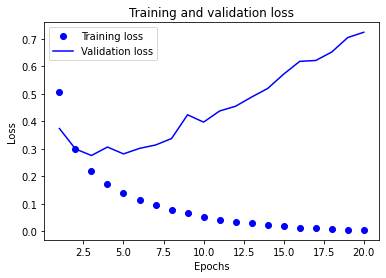

In [22]:
train_val_loss(history)

## Training and Validation Accuracy

In [23]:
def train_val_acc(history: keras.models.Sequential.fit):
    history_dict = history.history
    
    plt.clf()  
    try:
        acc = history_dict['acc'] 
        val_acc = history_dict['val_acc']
    except: 
        acc = history_dict['accuracy']
        val_acc = history_dict['val_accuracy'] 
    
    epochs = range(1, len(val_acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


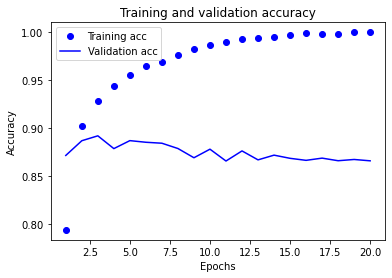

In [24]:
train_val_acc(history)

# Model 2

In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.4440 - accuracy: 0.8270
Epoch 2/4
25000/25000 [==============================] - 2s 60us/step - loss: 0.2542 - accuracy: 0.9098
Epoch 3/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.1981 - accuracy: 0.9289
Epoch 4/4
25000/25000 [==============================] - 4s 154us/step


In [26]:
results

[0.2972165199613571, 0.8817600011825562]

In [27]:
model.predict(x_test)

array([[0.1964542 ],
       [0.9996985 ],
       [0.96635944],
       ...,
       [0.15140474],
       [0.08341369],
       [0.7154578 ]], dtype=float32)

# Model 3

In [28]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.4837 - accuracy: 0.7894 - val_loss: 0.3458 - val_accuracy: 0.8798
Epoch 2/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.2744 - accuracy: 0.9049 - val_loss: 0.3119 - val_accuracy: 0.8755
Epoch 3/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1885 - accuracy: 0.9373 - val_loss: 0.3180 - val_accuracy: 0.8725
Epoch 4/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1503 - accuracy: 0.9486 - val_loss: 0.2961 - val_accuracy: 0.8843
Epoch 5/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1134 - accuracy: 0.9648 - val_loss: 0.3806 - val_accuracy: 0.8598
Epoch 6/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.0992 - accuracy: 0.9668 - val_loss: 0.3319 - val_accuracy: 0.8826
Epoch 7/20
15000/15000 [==============================] - 1s 96u

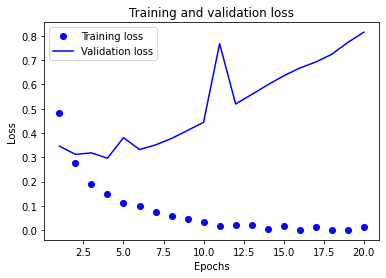

In [29]:
train_val_loss(history)

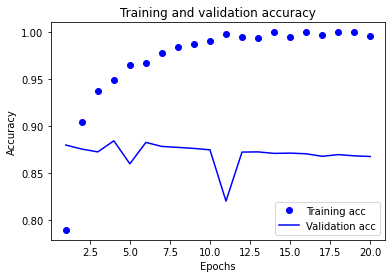

In [30]:
train_val_acc(history)

In [31]:
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/3
25000/25000 [==============================] - 2s 68us/step - loss: 0.2289 - accuracy: 0.9462
Epoch 2/3
25000/25000 [==============================] - 2s 67us/step - loss: 0.1191 - accuracy: 0.9636
Epoch 3/3
25000/25000 [==============================] - 4s 158us/step


[0.49458584228754043, 0.8594800233840942]

# Model 4

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.5164 - accuracy: 0.7824 - val_loss: 0.3731 - val_accuracy: 0.8750
Epoch 2/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2872 - accuracy: 0.9061 - val_loss: 0.3128 - val_accuracy: 0.8773
Epoch 3/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.2040 - accuracy: 0.9293 - val_loss: 0.3503 - val_accuracy: 0.8540
Epoch 4/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1579 - accuracy: 0.9467 - val_loss: 0.2950 - val_accuracy: 0.8861
Epoch 5/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1227 - accuracy: 0.9599 - val_loss: 0.3289 - val_accuracy: 0.8753
Epoch 6/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1055 - accuracy: 0.9668 - val_loss: 0.4182 - val_accuracy: 0.8540
Epoch 7/20
15000/15000 [==============================] - 1s 91us/

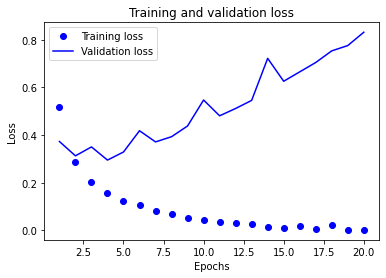

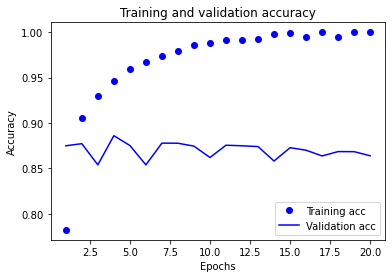

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

train_val_loss(history)
train_val_acc(history)

In [33]:
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/3
25000/25000 [==============================] - 2s 67us/step - loss: 0.2714 - accuracy: 0.9422
Epoch 2/3
25000/25000 [==============================] - 2s 68us/step - loss: 0.1461 - accuracy: 0.9571
Epoch 3/3
25000/25000 [==============================] - 2s 94us/step


[0.4553085445022583, 0.858680009841919]